# Shrinkage estimators and Akaike criterion


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

## Part 1
- Generate a dataset according to a Gaussian sequence model
- Take the mean to be a cosine function and plot the dataset

In [12]:
def generate_dataset(mu, sigma):
    """Generate a dataset according to the Gaussian sequence model
    y = mu + z where z is a Gaussian variable
    with variance sigma^2 I

    Parameters
    ----------
    mu : array of size n
        Mean
    sigma : float
        Standard deviation

    Returns
    -------
    Y : array of size (n)
        Noisy observation
    """
    n = mu.shape[0]
    z = np.random.multivariate_normal(np.zeros(n,), (sigma**2)*np.eye(n))
    X = mu + z
    return X
    #raise NotImplementedError

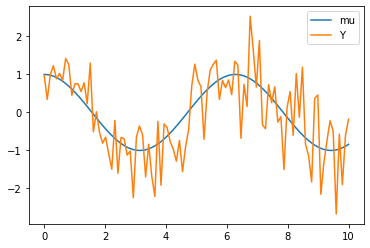

In [17]:


def cosine_dataset():
    """Take a grid of n=100 points between 0 and 10, take
    mu[i] = cos(i) where i is the value of each point
    and generate a dataset according to the Gaussian sequence
    model with sigma^2 = 0.5

    Return
    ------
    mu : array of size n
        Mean
    sigma : float
        Standard deviation
    y : array of size (n)
        Noisy observation
    grid : array of size n
        The grid used to generate mu
    """
    grid = np.linspace(0, 10, 100)
    mu = np.cos(grid)
    sigma = np.sqrt(0.5)
    y = generate_dataset(mu, sigma)
    
    return mu, sigma, y, grid
    #raise NotImplementedError

def plot_dataset():
    """
    Plot on the same graph mu in function of i and Y in function
    of i (taking sigma^2 = 0.5)
    """
    mu, sigma, y, grid = cosine_dataset()
    plt.plot(grid, mu, label='mu')
    plt.plot(grid, y, label="Y")
    plt.legend()
    #plt.show()
    #raise NotImplementedError

plot_dataset()

## Part 2
- Implement a shrinkage estimator
- Compute the expected error for a grid of shrinkage coefficients

In [ ]:

mu, sigma, _, _ = cosine_dataset()

def shrinkage(y, s):
    """ The shrinkage estimator
    Observe y and returns s * y
    Parameters
    -----------
    y: array of size n
        Observation
    s: float between 0 and 1
        Shrinkage coefficient
    Return
    ------
    sy: array of size n
        Shrinked observations
    """
    raise NotImplementedError

def expected_error(mu_h, mu, sigma, n_trials):
    """
    Compute the expected error between mu_h and mu
    for a number (trials) of different datasets
    (with the same mean mu)

    Parameters
    ----------
    mu_h: function from an array of size n to an array of size n
        Estimator of mu
    mu: array of size n
        True value of mu
    n_trials: int
        Number of trials

    Return
    ------
    E: float
        Expected mean squared error of mu_h
    """
    raise NotImplementedError



def plot_shrinkage():
    """
    Take s in a grid between 0 and 1 with 100 points.
    Plot in function of s the mean squared error of
    the shrinkage estimator.
    Plot a vertical line at the maximum value
    s =  1/(1 + n sigma^2 / (|mu|^2)) where the norm is the l2 norm
    """
    raise NotImplementedError

plot_shrinkage()

## Part 3
- Compute Akaike criterion for linear estimators (y_hat = Ay)
- Compute A for linear regression
- Using the Akaike criterion for linear regression, select the best 3 subset of features in the diabete dataset and check that the linear regression using only the 3 best features outperform the linear regression with all features

In [ ]:


def akaike(A, y, sigma):
    """
    Compute the akaike estimator of the error of mu_hat = Ay
    Recall that it is given by
    ||mu_hat - y ||^2 + 2 sigma^2 tr(A) - sigma^2 n

    Parameters
    -----------
    A: array of shape (n, n)
    y: array of shape n
    sigma: float

    Return
    -------
    akaike: float
    """
    raise NotImplementedError


def linear_regression_coefficients(X, y):
    """
    Return argmin_b ||Xb - y ||^2

    Parameters
    ----------
    X : array of shape (n, p)
        Design matrix

    y: array of shape n
        Observation

    Return
    ------
    b: array of shape p
        regression coefficients
    """
    raise NotImplementedError


def linear_regression_operator(X):
    """
    Return A such that  argmin_b ||Xb - y ||^2 = Ay

    Parameters
    ----------
    X : array of shape (n, p)
        Design matrix

    Return
    ------
    A: array of shape n, n
        linear regression operator
    """
    raise NotImplementedError


def akaike_regression(X, y, sigma):
    """ Akaike criterion for linear regression
    with design matrix X
    Find A such that Ay = b_hat = argmin_b || Xb - y ||^2
    Return the Akaike estimate of the error of y_hat = X b_hat

    Parameters
    ----------
    X : array
        Design matrix
    y: array of shape n
        Observation
    sigma: float
        standard deviation

    Return
    ------
    akaike : float
        The akaike estimate of the error of y_hat
    """
    raise NotImplementedError


def select_best_3_features(X, y, sigma):
    """ Loop across features of X to find the best according to Akaike
    Consider all possible choice of 3 features across
    the number of features of X.
    For each choice of 3 features:
    - Build the matrix Xp which is of size (n, 3) and only contains
    the chosen features.
    - Compute the akaike regression criterion of Xp
    Return Xp which yields the lowest akaike regression criterion

    Parameters
    ---------
    X : array (n_samples, n_features)
        Design matrix
    y: array of shape n
        Observation
    sigma: float
        standard deviation

    Return
    -------
    S: boolean array (n_features,)
        S[i] = True if feature i is selected
        S has at exactly 3 non-False coefficients
    """
    raise NotImplementedError


def test_diabetes():
    from sklearn.datasets import load_diabetes
    from sklearn.model_selection import train_test_split
    data = load_diabetes()
    X, y = data.data, data.target
    print(X.shape)
    X = np.column_stack([X, np.ones(len(X)).reshape(-1, 1)])
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
    S = select_best_3_features(X_train, y_train, sigma)
    b = linear_regression_coefficients(X_train, y_train)
    bS = linear_regression_coefficients(X_train[:, S], y_train)
    error = np.mean((X_test.dot(b) - y_test)**2)
    errorS = np.mean((X_test[:, S].dot(bS) - y_test)**2)
    print("Error without feature selection", error)
    print("Error with feature selection", errorS)
    assert errorS < error


test_diabetes()









# Bonus

Take Ridge Regression min_b ||Xb - y ||^2 + lambda ||b||^2
And find the best lambda using akaike criterion

Check that it gives better results in practice (diabete dataset)